In [1]:
import tensorflow as tf
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from skimage import feature # This pacakge is used for LBP feature extraction
from sklearn import metrics
import seaborn as sns # This pacakge is used for better visualization of data (e.g confusion matrix)

%load_ext tensorboard

In [2]:
from tensorflow import keras
print(tf.__version__)


2.13.1


In [3]:
import os
from os.path import isfile, join
import re


mypath = 'dataset_42028assg1_13918471'
categories = ['!', ')', '[', '+', '=', 'cos', 'div', 'sum', 'tan', 'times']
dataset = []
img_index_arr = []
# files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

def load_data():
    for category in categories:
        path = os.path.join(mypath, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img),0)
                new_array = cv2.resize(img_array, (28,28))
                dataset.append(new_array)
                img_index_arr.append(class_num)
            except Exception as e:
                print(e)


In [4]:
load_data()

!
)
+
sum


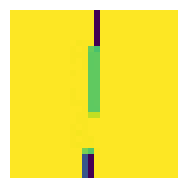

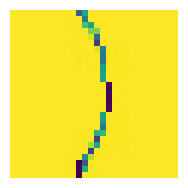

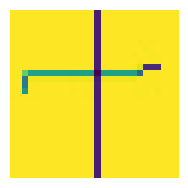

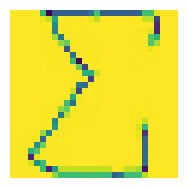

In [5]:
datasetArr = np.array(dataset)

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.axis('off')
ax1.imshow(dataset[0])
print(categories[img_index_arr[0]])

fig = plt.figure()
ax1 = fig.add_subplot(2,2,2)
ax1.axis('off')
ax1.imshow(dataset[500])
print(categories[img_index_arr[500]])

fig = plt.figure()
ax1 = fig.add_subplot(2,2,3)
ax1.axis('off')
ax1.imshow(dataset[1500])
print(categories[img_index_arr[1500]])

fig = plt.figure()
ax1 = fig.add_subplot(2,2,4)
ax1.axis('off')
ax1.imshow(dataset[3500])
print(categories[img_index_arr[3500]])


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(datasetArr, img_index_arr) 


In [7]:
X_val = np.array(X_train[:500] /255.0)
Y_val = np.array(Y_train[:500]) 

X_train = np.array(X_train [500:] /255.0)
Y_train = np.array(Y_train [500:])

X_test = np.array(X_test /255.0)
Y_test = np.array(Y_test)

print(X_train[4])


[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.99607843 0.99607843
  0.58823529 0.2        0.99607843 1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.99607843 1.
  1.         0.19607843 1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.99607843 0.99607843
  0.99607843 0.2        0.99607843 1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.99607843 0.9960

In [8]:
# plt.imshow(data_train[0])

print(np.shape(X_train))
print(np.shape(X_val))
print(np.shape(X_test))

(3250, 28, 28)
(500, 28, 28)
(1250, 28, 28)


In [9]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[28,28]),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
#Visualize Network Model
modelViz_file= 'model_1.png' # Model filename

# Plot model
keras.utils.plot_model(model, to_file=modelViz_file, show_shapes=True)

In [11]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

H=model.fit(X_train, Y_train, epochs=10,validation_data=(X_val, Y_val))

Epoch 1/10
102/102 [==============================] - 1s 4ms/step - loss: 2.2521 - accuracy: 0.2009 - val_loss: 2.0245 - val_accuracy: 0.3560
Epoch 2/10
102/102 [==============================] - 0s 2ms/step - loss: 1.9122 - accuracy: 0.4169 - val_loss: 1.7332 - val_accuracy: 0.5140
Epoch 3/10
102/102 [==============================] - 0s 2ms/step - loss: 1.5698 - accuracy: 0.5935 - val_loss: 1.3965 - val_accuracy: 0.7120
Epoch 4/10
102/102 [==============================] - 0s 2ms/step - loss: 1.3211 - accuracy: 0.6615 - val_loss: 1.1519 - val_accuracy: 0.8020
Epoch 5/10
102/102 [==============================] - 0s 2ms/step - loss: 1.0999 - accuracy: 0.7366 - val_loss: 1.0349 - val_accuracy: 0.7120
Epoch 6/10
102/102 [==============================] - 0s 2ms/step - loss: 0.9644 - accuracy: 0.7671 - val_loss: 0.8800 - val_accuracy: 0.8000
Epoch 7/10
102/102 [==============================] - 0s 2ms/step - loss: 0.8570 - accuracy: 0.7837 - val_loss: 0.7932 - val_accuracy: 0.7860
Epoch 

In [12]:
model1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[28,28]),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model1.compile(optimizer = tf.optimizers.SGD(0.01),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

H=model1.fit(X_train, Y_train, epochs=10,validation_data=(X_val, Y_val))


Epoch 1/10
102/102 [==============================] - 1s 3ms/step - loss: 2.2547 - accuracy: 0.1726 - val_loss: 2.2159 - val_accuracy: 0.1400
Epoch 2/10
102/102 [==============================] - 0s 2ms/step - loss: 2.0938 - accuracy: 0.2717 - val_loss: 2.0525 - val_accuracy: 0.2500
Epoch 3/10
102/102 [==============================] - 0s 2ms/step - loss: 1.9380 - accuracy: 0.3735 - val_loss: 1.8371 - val_accuracy: 0.4940
Epoch 4/10
102/102 [==============================] - 0s 2ms/step - loss: 1.7716 - accuracy: 0.4702 - val_loss: 1.7439 - val_accuracy: 0.4400
Epoch 5/10
102/102 [==============================] - 0s 2ms/step - loss: 1.6180 - accuracy: 0.5289 - val_loss: 1.5656 - val_accuracy: 0.5440
Epoch 6/10
102/102 [==============================] - 0s 2ms/step - loss: 1.4723 - accuracy: 0.5908 - val_loss: 1.5944 - val_accuracy: 0.4700
Epoch 7/10
102/102 [==============================] - 0s 2ms/step - loss: 1.3498 - accuracy: 0.6474 - val_loss: 1.3311 - val_accuracy: 0.6320
Epoch 

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


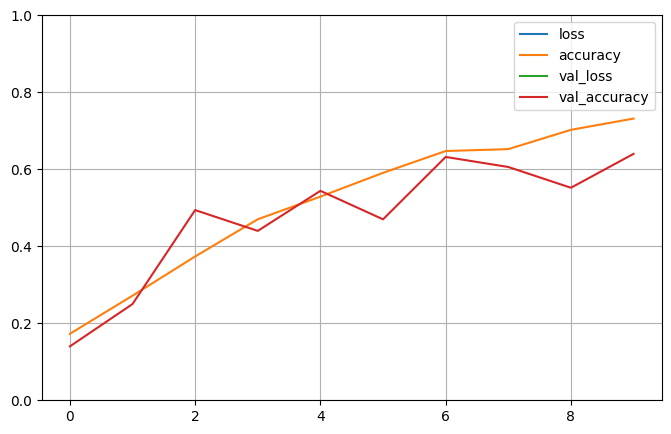

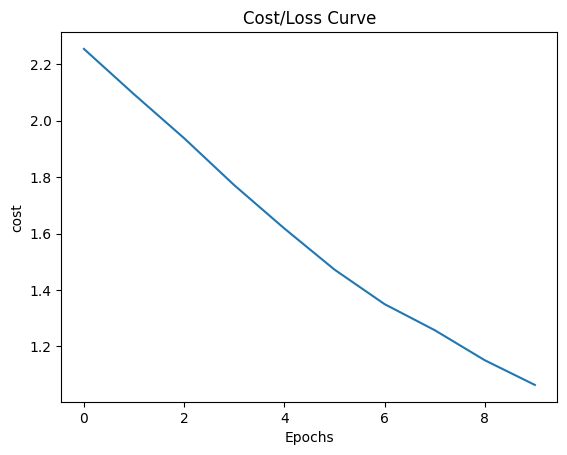

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(H.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

plt.plot(H.history['loss'])
plt.ylabel('cost')
plt.xlabel('Epochs')
plt.title("Cost/Loss Curve")
plt.show()

In [16]:
model.evaluate(X_test, Y_test)

40/40 [==============================] - 0s 1ms/step - loss: 0.7211 - accuracy: 0.7936


[0.7210937738418579, 0.7936000227928162]